![https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png](https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png)

In [ ]:
!pip install invertedai
import os
from IPython.display import clear_output
clear_output()
os.kill(os.getpid(), 9)

In [1]:
from IPython.display import display, Image, clear_output
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2
import invertedai as iai
clear_output()

# Provide your API key

In [2]:
iai.add_apikey("")

# Setup

Set up the simulation by specifying the location and simulation lenght (1 step = 0.1 second)

In [3]:
location = "canada:vancouver:drake_street_and_pacific_blvd"
# location = "canada:vancouver:ubc_roundabout"

simulation_length = 30 

# Preview the map location

(None, <matplotlib.image.AxesImage at 0x7f1d2b03cbb0>)

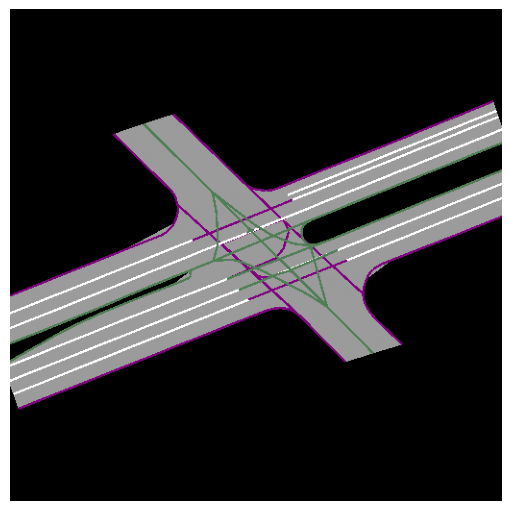

In [10]:
location_info_response = iai.location_info(location=location)
rendered_map = location_info_response.birdview_image.decode()
fig, ax = plt.subplots(constrained_layout=True, figsize=(5, 5))
ax.set_axis_off(), ax.imshow(rendered_map)

# Light
First check if there are any traffic-lights on the map and then get the states

In [11]:
if any(actor.agent_type == "traffic-light" for actor in location_info_response.static_actors):
    scene_has_lights = True
    light_response = iai.light(location=location)
else:
    light_response = None
    scene_has_lights = False


# Initialize
Initialize the simulation by spawning NPCs on the map


(None, <matplotlib.image.AxesImage at 0x7f1d283a71c0>)

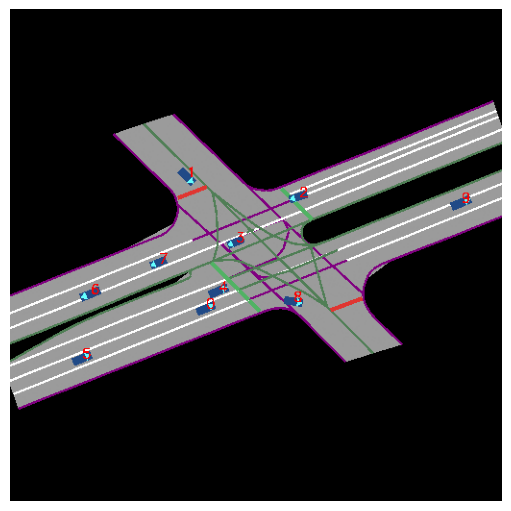

In [15]:
response = iai.initialize(location, 
    traffic_light_state_history=[light_response.traffic_lights_states] if scene_has_lights else None,
    get_birdview = True,                                                         
    agent_count = 10,)
agent_attributes = response.agent_attributes
rendered_map = response.birdview.decode()
fig, ax = plt.subplots(constrained_layout=True, figsize=(5, 5))
ax.set_axis_off(), ax.imshow(rendered_map)

# Drive
Start the simulation.\
(Returning the birdviews will casue a much longer response time than running without them.)

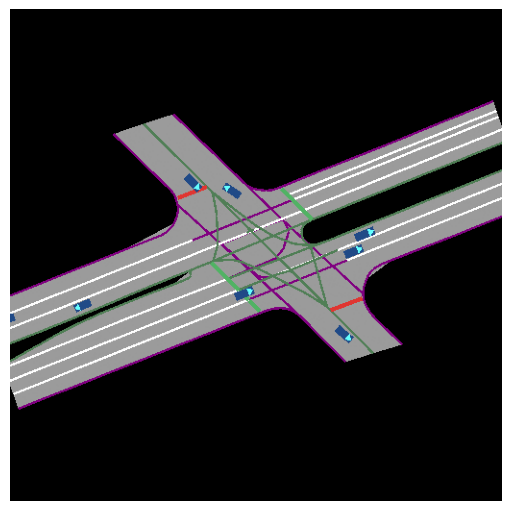

In [16]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5, 5))
ax.set_axis_off()
frames = []
for t in range(simulation_length):
    
    light_response = iai.light(location=location, recurrent_states=light_response.recurrent_states) if scene_has_lights else None
    
    
    response = iai.drive(
        agent_attributes=agent_attributes,
        agent_states=response.agent_states,
        recurrent_states=response.recurrent_states,
        get_birdview=True,
        location=location,
        get_infractions=True,
        traffic_lights_states=light_response.traffic_lights_states if scene_has_lights else None,
    )

    image = response.birdview.decode()
    frames.append(image)
    ax.imshow(frames[-1])
    display(plt.gcf())
    clear_output(wait=True)  

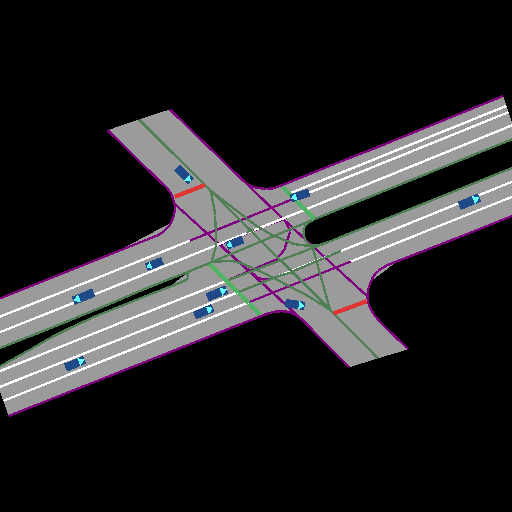

In [17]:
imageio.mimsave("iai-drive.gif", np.array(frames), format="GIF-PIL")
Image(open('iai-drive.gif','rb').read())